#### Dicionário de dados

* `id_cliente`: número de identificação único de cada cliente
* `churn`: se o cliente deixou ou não a empresa
* `genero`: gênero (masculino e feminino)
* `idoso`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `parceiro`:  se o cliente possui ou não um parceiro ou parceira
* `dependentes`: se o cliente possui ou não dependentes
* `meses_contrato`:  meses de contrato do cliente
* `servico_telefone`: assinatura de serviço telefônico
* `varias_linhas`: assisnatura de mais de uma linha de telefone
* `servico_internet`: assinatura de um provedor internet
* `seguranca_online`: assinatura adicional de segurança online
* `backup_online`: assinatura adicional de backup online
* `protecao_dispositivo`: assinatura adicional de proteção no dispositivo
* `suporte_tecnico`: assinatura adicional de suporte técnico, menos tempo de espera
* `tv_streaming`: assinatura de TV a cabo
* `filmes_streaming`: assinatura de streaming de filmes
* `contrato`: tipo de contrato
* `faturamento_eletronico`: se o cliente prefere receber online a fatura
* `metodo_pagamento`: forma de pagamento
* `cobranca.mensal`: total de todos os serviços do cliente por mês
* `cobranca.total`: total gasto pelo cliente

#Importando a base de dados

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px

In [2]:
# Ler arquivo json

df = pd.read_json('../Dados/Telco-Customer-Churn.json')

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Normalizando os dados json

In [4]:
# Carregando arquivo json como objeto python

with open('../Dados/Telco-Customer-Churn.json') as f:
  raw_json = json.load(f)

In [5]:
# Normalizando os dados json aninhados

normalized_data = pd.json_normalize(raw_json)
normalized_data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Traduzindo as colunas

In [6]:
normalized_data.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [7]:
# Mapeando o nome das colunas

nome_colunas = {'customerID': 'id_cliente',
                'Churn': 'churn',
                'customer.gender': 'cliente.genero',
                'customer.SeniorCitizen': 'cliente.idoso',
                'customer.Partner': 'cliente.parceiro',
                'customer.Dependents': 'cliente.dependentes',
                'customer.tenure': 'cliente.meses_contrato',
                'phone.PhoneService': 'telefone.servico_telefone',
                'phone.MultipleLines': 'telefone.varias_linhas',
                'internet.InternetService': 'internet.servico_internet',
                'internet.OnlineSecurity': 'internet.seguranca_online',
                'internet.OnlineBackup': 'internet.backup_online',
                'internet.DeviceProtection': 'internet.protecao_dispositivo',
                'internet.TechSupport': 'internet.suporte_tecnico',
                'internet.StreamingTV': 'internet.tv_streaming',
                'internet.StreamingMovies': 'internet.filmes_streaming',
                'account.Contract': 'conta.contrato',
                'account.PaperlessBilling': 'conta.faturamento_eletronico',
                'account.PaymentMethod': 'conta.metodo_pagamento',
                'account.Charges.Monthly': 'conta.cobranca.mensal',
                'account.Charges.Total': 'conta.cobranca.total'}

normalized_data = normalized_data.rename(columns=nome_colunas)

In [8]:
# Visualizando somente os valores que eu irei traduzir

for col in normalized_data.columns:
  if len(normalized_data[col].unique()) < 6 and not all(normalized_data[col].isin([0, 1])):
    print(normalized_data[col].unique())

['No' 'Yes' '']
['Female' 'Male']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [9]:
# Mapeando os valores únicos das colunas

valores_traduzidos = {
    'Yes': 'Sim',
    'No': 'Não',
    'Male': 'Masculino',
    'Female': 'Feminino',
    'No internet service': 'Sem serviço de internet',
    'No phone service': 'Sem serviço de telefone',
    'Fiber optic': 'Fibra óptica',
    'One year': 'Um ano',
    'Two year': 'Dois anos',
    'Month-to-month': 'mês a mês',
    'Mailed check': 'Cheque enviado',
    'Electronic check': 'Cheque eletrônico',
    'Credit card (automatic)': 'Cartão de crédito (automático)',
    'Bank transfer (automatic)': 'Transferência bancária (automático)'
}
normalized_data = normalized_data.replace(valores_traduzidos)
normalized_data.head()

,id_cliente,churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.meses_contrato,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamento_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um ano,Sim,Cheque enviado,65.6,593.3
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,mês a mês,Não,Cheque enviado,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,mês a mês,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,mês a mês,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,mês a mês,Sim,Cheque enviado,83.9,267.4


# Entendendo as informações do conjunto de dados

In [10]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7267 non-null   object 
 1   churn                          7267 non-null   object 
 2   cliente.genero                 7267 non-null   object 
 3   cliente.idoso                  7267 non-null   int64  
 4   cliente.parceiro               7267 non-null   object 
 5   cliente.dependentes            7267 non-null   object 
 6   cliente.meses_contrato         7267 non-null   int64  
 7   telefone.servico_telefone      7267 non-null   object 
 8   telefone.varias_linhas         7267 non-null   object 
 9   internet.servico_internet      7267 non-null   object 
 10  internet.seguranca_online      7267 non-null   object 
 11  internet.backup_online         7267 non-null   object 
 12  internet.protecao_dispositivo  7267 non-null   o

In [11]:
normalized_data.describe()

,cliente.idoso,cliente.meses_contrato,conta.cobranca.mensal
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [12]:
# Verificando os valores unicos em cada coluna

for col in normalized_data.columns:
  print(f'Coluna: {col}')
  print(normalized_data[col].unique())
  print('-' * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: churn
['Não' 'Sim' '']
------------------------------
Coluna: cliente.genero
['Feminino' 'Masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['Sim' 'Não']
------------------------------
Coluna: cliente.dependentes
['Sim' 'Não']
------------------------------
Coluna: cliente.meses_contrato
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna: telefone.servico_telefone
['Sim' 'Não']
------------------------------
Coluna: telefone.varias_linhas
['Não' 'Sim' 'Sem serviço de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'Fibra óptica'

# Limpando os dados de cada coluna

In [13]:
normalized_data.isnull().sum() # Sem dados nulos

id_cliente                       0
churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.meses_contrato           0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamento_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.total             0
dtype: int64

In [14]:
normalized_data['churn'].value_counts()

Não    5174
Sim    1869
        224
Name: churn, dtype: int64

In [15]:
# Removendo valores vazios em Churn

normalized_data = normalized_data[normalized_data['churn']!= '']
normalized_data.reset_index(drop=True, inplace=True)

In [16]:
normalized_data['churn'].value_counts()

Não    5174
Sim    1869
Name: churn, dtype: int64

In [17]:
normalized_data[normalized_data['cliente.meses_contrato'] == 0][['cliente.meses_contrato', 'conta.cobranca.mensal', 'conta.cobranca.total']]

,cliente.meses_contrato,conta.cobranca.mensal,conta.cobranca.total
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


Nota-se que quando os meses de contrato do cliente sao iguais a 0, os valores em 'conta.cobranca.total' são vazios, então devemos realizar a substituição desses valores vazios pelo valor em 'conta.cobranca.mensal', que nesse caso, representa o total a ser cobrado.

In [18]:
# Preenchendo os valores vazios em conta.cobranca.total
normalized_data.loc[normalized_data['cliente.meses_contrato'] == 0, 'conta.cobranca.total'] = normalized_data['conta.cobranca.mensal']

In [19]:
normalized_data[normalized_data['cliente.meses_contrato'] == 0][['cliente.meses_contrato', 'conta.cobranca.mensal', 'conta.cobranca.total']]

,cliente.meses_contrato,conta.cobranca.mensal,conta.cobranca.total
945,0,56.05,56.05
1731,0,20.00,20.0
1906,0,61.90,61.9
2025,0,19.70,19.7
2176,0,20.25,20.25
2250,0,25.35,25.35
2855,0,73.35,73.35
3052,0,25.75,25.75
3118,0,52.55,52.55
4054,0,80.85,80.85


In [20]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7043 non-null   object 
 1   churn                          7043 non-null   object 
 2   cliente.genero                 7043 non-null   object 
 3   cliente.idoso                  7043 non-null   int64  
 4   cliente.parceiro               7043 non-null   object 
 5   cliente.dependentes            7043 non-null   object 
 6   cliente.meses_contrato         7043 non-null   int64  
 7   telefone.servico_telefone      7043 non-null   object 
 8   telefone.varias_linhas         7043 non-null   object 
 9   internet.servico_internet      7043 non-null   object 
 10  internet.seguranca_online      7043 non-null   object 
 11  internet.backup_online         7043 non-null   object 
 12  internet.protecao_dispositivo  7043 non-null   o

In [21]:
# Mudando o tipo da variavel 'conta.cobranca.total' para float

normalized_data['conta.cobranca.total'] = normalized_data['conta.cobranca.total'].astype(float)

In [22]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7043 non-null   object 
 1   churn                          7043 non-null   object 
 2   cliente.genero                 7043 non-null   object 
 3   cliente.idoso                  7043 non-null   int64  
 4   cliente.parceiro               7043 non-null   object 
 5   cliente.dependentes            7043 non-null   object 
 6   cliente.meses_contrato         7043 non-null   int64  
 7   telefone.servico_telefone      7043 non-null   object 
 8   telefone.varias_linhas         7043 non-null   object 
 9   internet.servico_internet      7043 non-null   object 
 10  internet.seguranca_online      7043 non-null   object 
 11  internet.backup_online         7043 non-null   object 
 12  internet.protecao_dispositivo  7043 non-null   o

# Visualizações relevantes em relação ao Churn

In [23]:
sns.set_theme(style="whitegrid")
sns.set_palette("rocket")

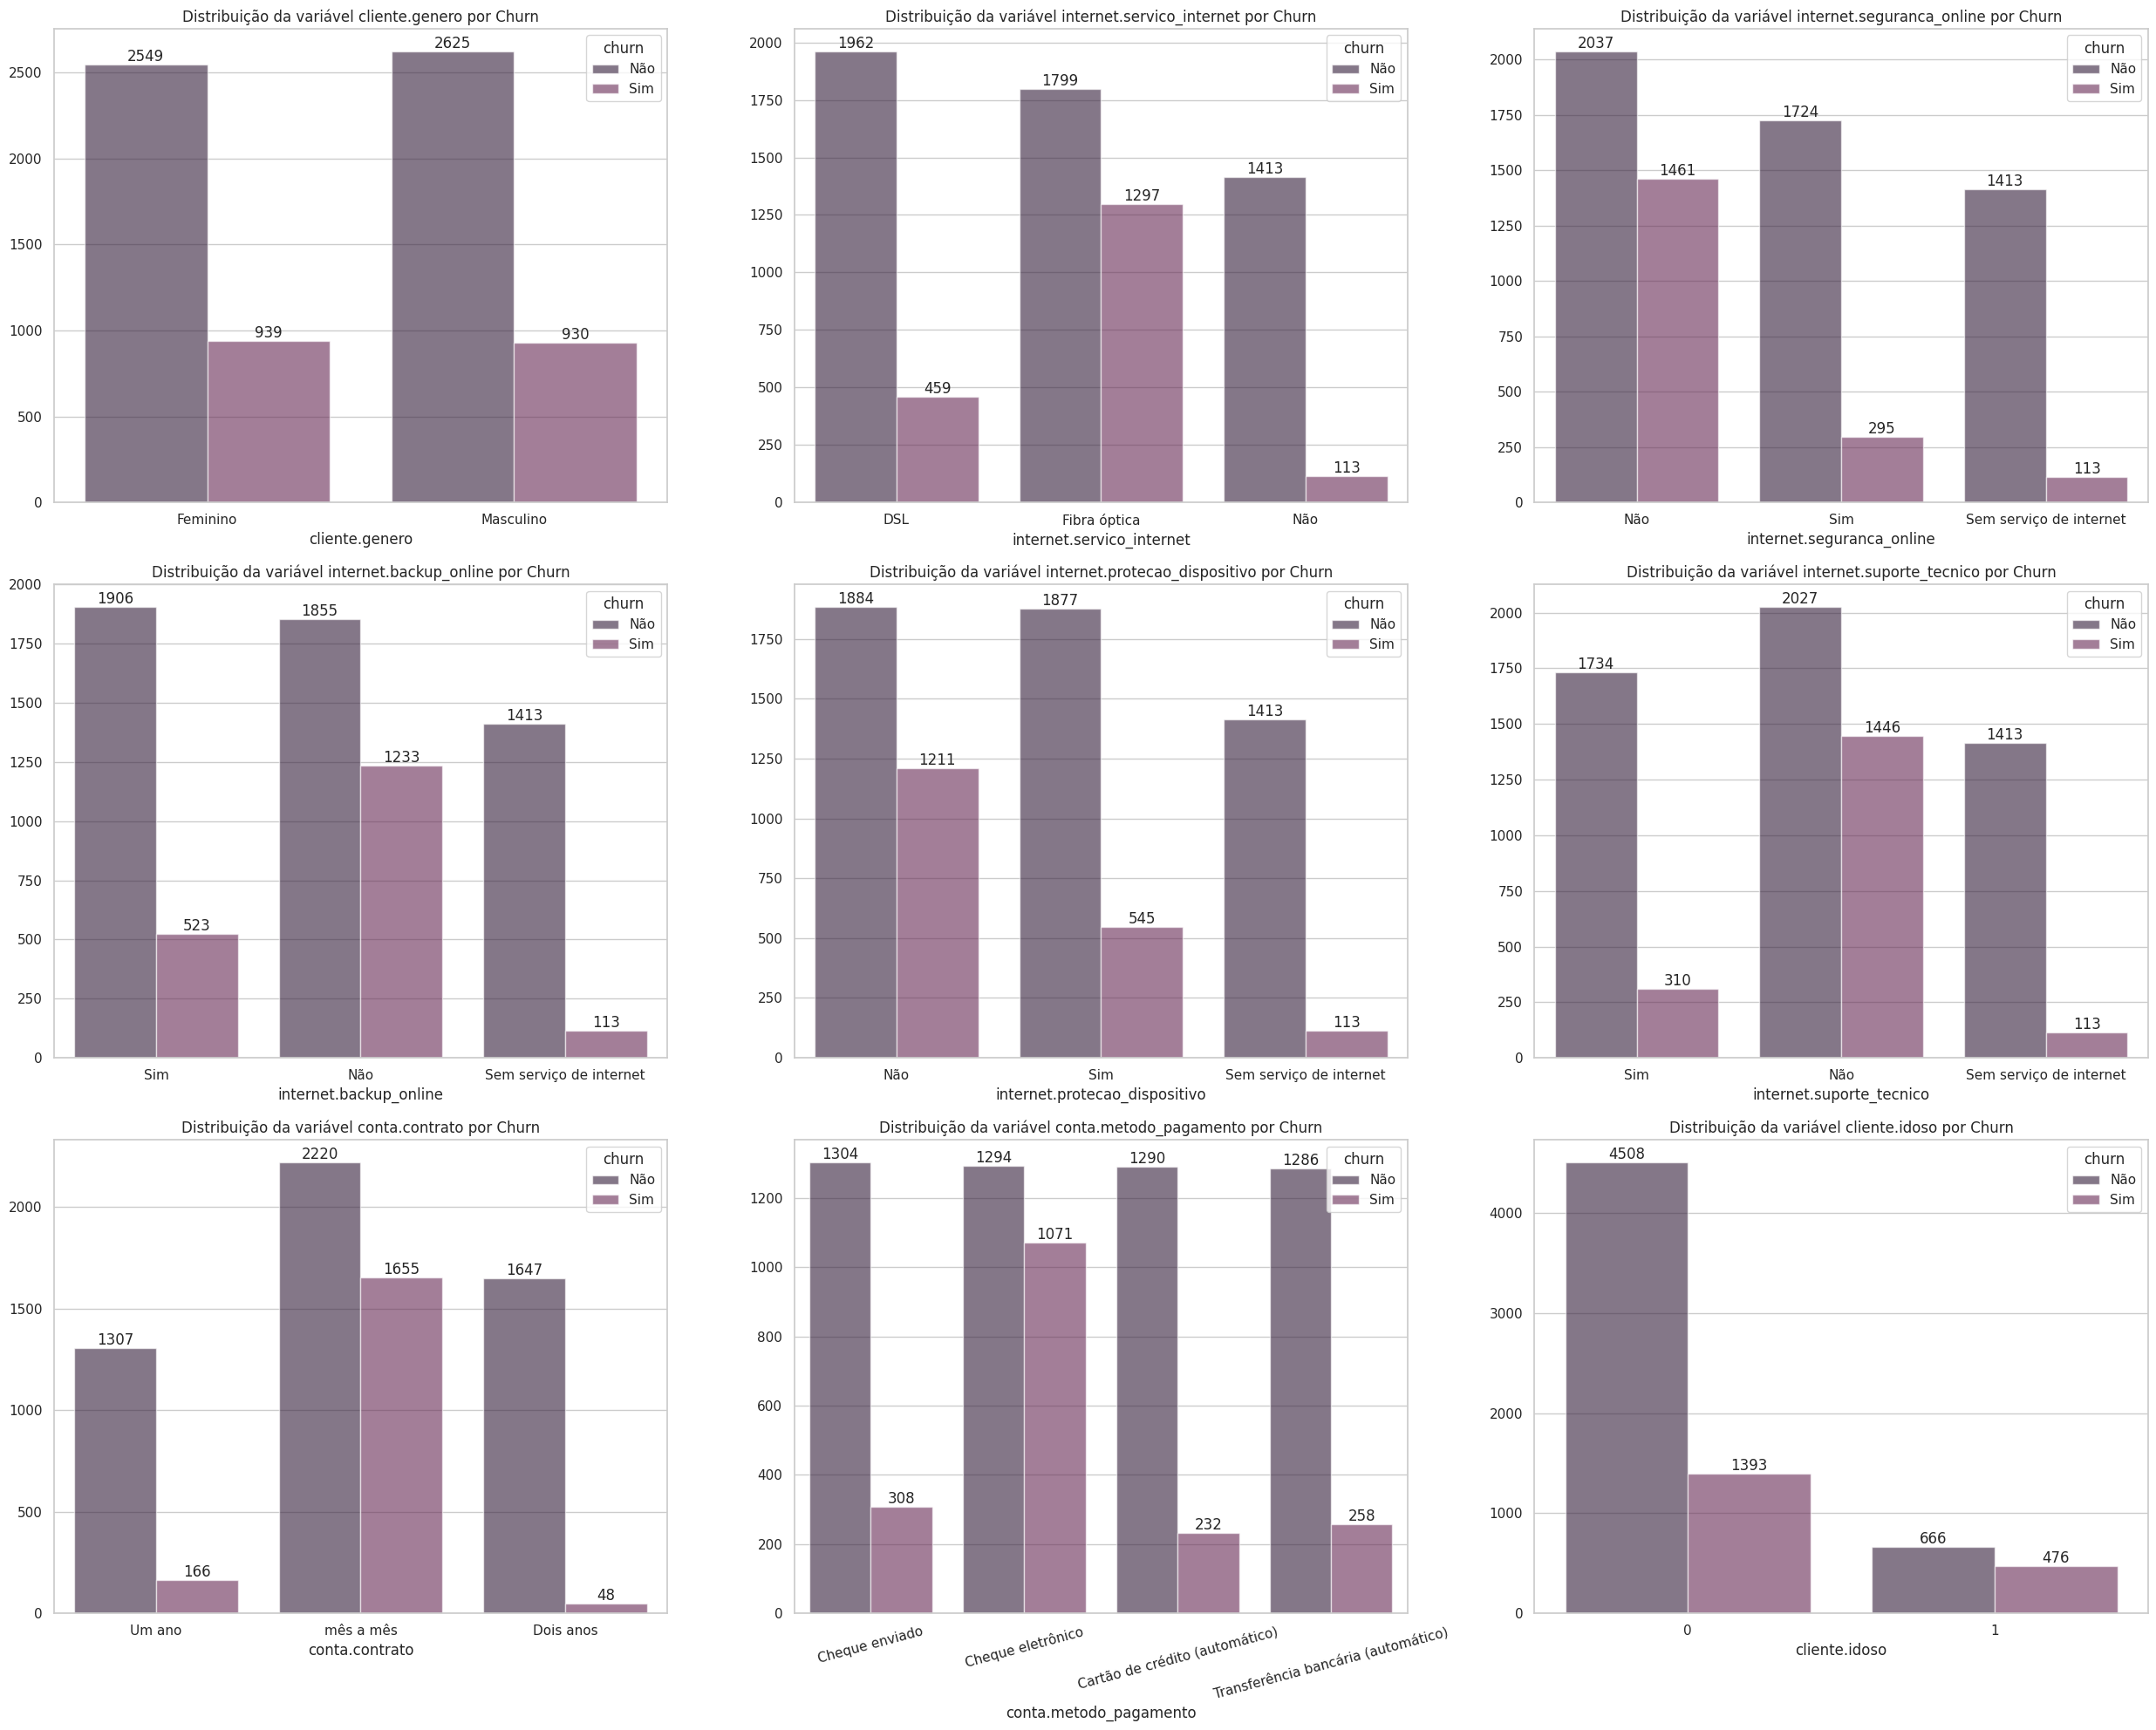

In [24]:
# Criar uma figura e eixos para os subplots em 3 linhas e 3 colunas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

# Variáveis a serem plotadas
plots = ['cliente.genero', 'internet.servico_internet', 'internet.seguranca_online',
         'internet.backup_online', 'internet.protecao_dispositivo', 'internet.suporte_tecnico',
         'conta.contrato', 'conta.metodo_pagamento', 'cliente.idoso']

# Para cada variável, criar um countplot em um dos subplots
for i, var in enumerate(plots):
    row = i // 3
    col = i % 3
    ax = sns.countplot(
        data=normalized_data, x=var, hue='churn', alpha=0.6, ax=axes[row, col]
    )
    ax.set_title(f'Distribuição da variável {var} por Churn')
    ax.set_xlabel(var)
    ax.set_ylabel('')

    # Adicionar a frequência exata no topo de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')

    # Girar os rótulos das colunas para melhor leitura nessa variável específica
    if var == 'conta.metodo_pagamento':
      ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

# Adicionar espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Ajustar o layout dos subplots para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

## Insights

 1. **Variável cliente.genero:** Podemos observar que a variável cliente.genero não exerce influência significativa sobre a taxa de churn, uma vez que a proporção de cancelamentos é similar entre os gêneros. É importante ressaltar que, ao considerar a irrelevância do gênero, a empresa pode direcionar seus esforços para áreas mais críticas na retenção de clientes.

2. **Variável internet.servico_internet:** Os clientes que optam pelo serviço de fibra óptica apresentam uma taxa de churn relativamente mais alta em comparação com outras opções. Nesse contexto, a empresa poderia considerar a expansão do serviço DSL, que demonstra uma menor taxa de evasão. Além disso, a empresa deve realizar uma análise mais aprofundada para identificar e resolver os problemas associados ao serviço de fibra ótica, como a instabilidade da conexão ou problemas de suporte técnico.

3. **Variáveis internet.seruranca_online e internet.backup_online:** Os clientes que não subscrevem aos serviços de segurança online e backup online são mais propensos a cancelar. Introduzir ofertas de segurança online e backup pode ser uma estratégia eficaz para mitigar a taxa de cancelamentos. Além disso, a empresa pode educar os clientes sobre os benefícios desses serviços, destacando como eles podem proteger seus dados e garantir uma experiência mais confiável.

4. **Variável internet.protecao_dispositivo:** Clientes desprovidos de proteção de dispositivo estão inclinados a abandonar os serviços da empresa. A implementação de um serviço de proteção não apenas reduzirá o churn, mas também fortalecerá a segurança dos clientes, protegendo-os contra ameaças cibernéticas e perda de dados. Isso pode ser uma vantagem competitiva significativa no mercado.

5. **Variável internet.suporte_tecnico:** Clientes que não têm acesso ao suporte técnico tendem a cancelar os serviços da empresa. Oferecer suporte técnico é uma opção viável para atenuar a taxa de cancelamentos. Além disso, a empresa pode considerar aprimorar a qualidade e a disponibilidade do suporte técnico para garantir uma experiência mais satisfatória para seus clientes.

6. **Variável conta.contrato:** Clientes com contratos mensais são mais propensos a cancelar os serviços da empresa. A empresa poderia considerar a introdução de contratos anuais ou de dois anos como uma alternativa para reduzir a taxa de cancelamento. Contratos de longo prazo não apenas fidelizam os clientes, mas também proporcionam estabilidade financeira à empresa, o que é vantajoso a longo prazo.

7. **Variável conta.metodo_pagamento:** Observa-se que os clientes que utilizam o método de pagamento "Cheque eletrônico" têm uma tendência maior de cancelar os serviços da empresa. Redirecionar os clientes para outros métodos de pagamento, como cartão de crédito, que apresenta a menor taxa de cancelamento, pode ser uma medida eficaz. Além disso, a empresa pode oferecer incentivos, como descontos, para encorajar a adoção de métodos de pagamento mais estáveis.

8. **Variável cliente.idoso:** Embora o número de clientes idosos seja consideravelmente menor, a proporção de cancelamentos entre esse grupo é superior à dos clientes mais jovens. Identificar as razões por trás dessa taxa de cancelamento entre os idosos e adotar medidas para aprimorar o serviço para esse segmento é uma estratégia valiosa para reduzir o churn. Isso pode incluir a simplificação da interface do serviço, a oferta de suporte dedicado aos idosos e a comunicação mais clara sobre os benefícios dos serviços oferecidos. Além disso, a empresa pode realizar pesquisas de satisfação específicas para esse grupo demográfico para entender melhor suas necessidades e expectativas.  

## Boxplot para as variáveis numéricas

In [ ]:
# Variáveis para visualizar
cols = ['cliente.meses_contrato', 'conta.cobranca.mensal', 'conta.cobranca.total']

# Configurações de tamanho da figura
width = 1200  # Largura
height = 300  # Altura

# Cor preta para as caixas e outliers
color = 'black'

# Loop para criar e exibir os boxplots
for col in cols:
    boxplot = px.box(normalized_data, x=col, y='churn')
    boxplot.update_layout(
        width=width,
        height=height,
        yaxis_title=' ',
        margin=dict(l=20, r=20, t=40, b=20)  # Ajustar as margens
    )

    # Definir a cor da borda e dos outliers para preto
    boxplot.update_traces(line=dict(color=color), marker=dict(color=color))

    if col == 'cliente.meses_contrato':
      boxplot.update_layout(title=f'Boxplots das variáveis em relação ao Churn')

    # Salvando cada boxplot em um png
    boxplot.write_image(f'{col}_boxplot.png')

    boxplot.show()

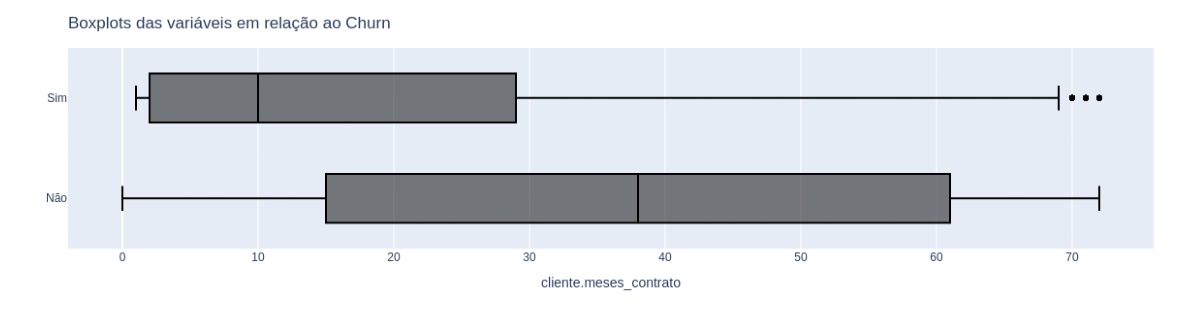

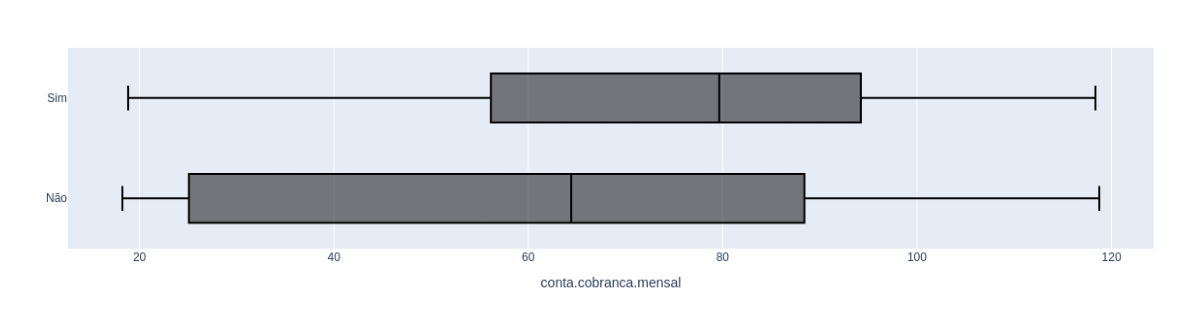

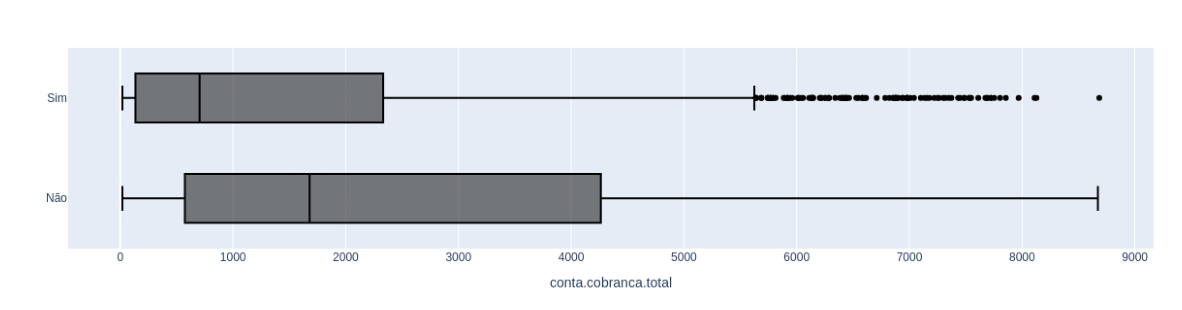

In [26]:
# Mostrando as imagens estáticas dos boxplots interativos acima

imagens = ['cliente.meses_contrato_boxplot.png', 'conta.cobranca.mensal_boxplot.png', 'conta.cobranca.total_boxplot.png']

for imagem in imagens:
  # Carregando a imagem
  img = mpimg.imread(imagem)

  plt.figure(figsize=(15, 4))

  # Exibindo a imagem
  plt.imshow(img)
  plt.axis('off')
  plt.show()

Os clientes que optaram por continuar com a empresa tendem a ter contratos em média mais longos em comparação com aqueles que optaram pelo cancelamento. Por outro lado, os clientes que escolheram cancelar seus serviços apresentam gastos mensais médios mais altos do que os que decidiram permanecer. Isso pode refletir uma variedade de fatores, incluindo diferentes tipos de serviços utilizados, por exemplo.

Em contrapartida, os clientes que cancelaram apresentaram gastos totais médios mais baixos do que aqueles que permaneceram com a empresa. Essa discrepância pode ser influenciada por diversos fatores, como a duração dos contratos ou variações no uso dos serviços ao longo do tempo.

## Analisando a correlação das variáveis

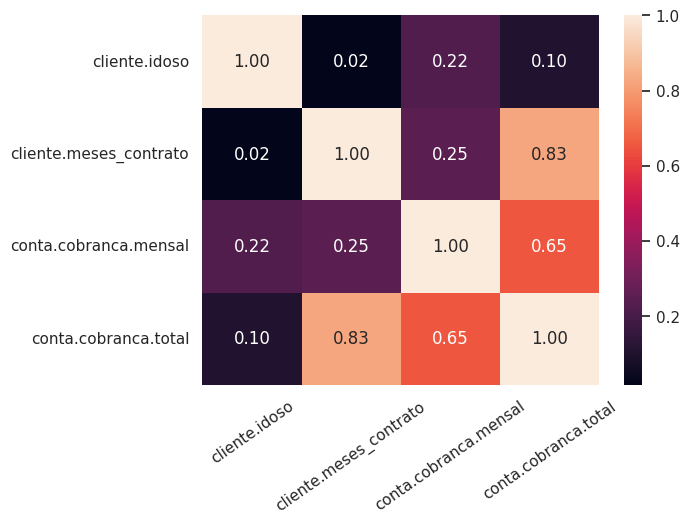

In [27]:
# Heatmap de correlação das variáveis numéricas

corr = normalized_data.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=35);